## Project Challenge: Exploratory and predictive analytics upon the comprehensive IMDb data of movies released between 1980-2020

### **_by Hanlu He (s183909), Mia Hang Knudsen (s183998), Jiafei Xia (s213084), Atefeh Hemmati Golsefidi (s216676)_**
---
## _Descriptive statistics notebook_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data Preparation</u>](#dataprep)
    - [2.1: <u>Load and present basic information of the dataset</u>](#load)
    - [2.2: <u>Dicussion of profiler output</u>](#profiler) 
- [Part 3: <u>Data Cleaning and Exploratory Data Analysis</u>](#datacl)
    - [3.1: <u>Dealing with missing values and redefine variable types</u>](#clean1)
- [Part 4: <u>Insight Exploration</u>](#insights)
    - [4.1 <u>Adding new attributes</u>](#add_attri)

---
<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

We will be working with dataset obtained through kaggle called [Comprehensive IMDb Data](https://www.kaggle.com/austinwolff/comprehensive-imdb-data). The dataset contains movies released in the USA between 1980-2020 that has available box office data. The dataset was created with the intention of what features/variables contribute most to the movie's box office success. Below is the features list that are included in the dataset.

**Features**

* **titleId**: IMDb's relational database ID for "title".
* **title**: Title of the movie.
* **rating**: MPAA (Motion Picture Association of America film rating system ) rating. 
* **region**: Region. 
* **genre**: The movie genre.
* **released**: Release date of the movie in theaters.
* **year**: Year of movie release.
* **month**: Month of movie release.
* **day**: Day of movie release.
* **score**: IMDb score.
* **director**: Director of the movie.
* **writer**: Writer of the movie.
* **star**: Main actor and actress of the movie.
* **country**: Main country of the movie.
* **budget**: Budget of the movie.
* **gross**: Gross revenue (box office) of the movie.
* **company**: Production company of the movie.
* **runtime**: Runtime of the movie in minutes. 
* **category**: Type of the credit this person ("primaryName") had for working on the movie. 
* **nconst**: IMDb's relational database ID for "primaryName".
* **primaryName**: Name of person who worked on the movie.
* **knownForTitles**: Top 4 titles an actor (indicated by "primaryName") is known for, by titleID. 

---
<a id='dataprep'></a>
## Part 2: _<u>Data Preparation</u>_

In [3]:
#data analysis libraries 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_theme()
from ipywidgets import interact

%matplotlib inline

<a id='load'></a>
### 2.1: _<u>Load and present basic information of the dataset</u>_

The dataset has __222569 observations and 22 features columns__. 5 of the features are of datatype floats, 1 is of type int and 16 are objects. From the Non-Null Count summary column we can see quite a few feature columns contain missing values, this will be explored more in depth in the next section. 

As we can see the value range varies extensively across the features, which could be an indication that we should probably standardise the data for later predictive tasks.  

<a id='profiler'></a>
### 2.2: _<u>Dicussion of profiler output</u>_

__Now let's take a deeper dive into the data by presenting the pandas profiler output__

In [84]:
## create pandas profiler output 
profile = ProfileReport(df, title="The IMDb Movie dataset", html={'style': {'full_width': True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

First of all, in the Overview section we can see that there are 64146 missing values in total, which accounts for 1.3% of the observations in the dataset. And there are 6 duplicate rows. As for the variables, we have 16 that are categorical, 6 numeric. Below is a more detialed list of the feature types: 

**Features**

* **titleId**: Categorical - _Discrete and Nominal_
* **title**: Categorical - _Discrete and Nominal_ 
* **rating**: Categorical - _Discrete and Ordinal_  
* **region**: Categorical - _Discrete and Nominal_
* **genre**: Categorical - _Discrete and Nominal_
* **released**: Categorical - _Discrete and Ordinal_
* **year**: Numeric - _Continuous and Interval_ 
* **month**: Categorical - _Discrete and Ordinal_
* **day**: Numeric - _Continuous and Interval_
* **score**: Numeric - _Continuous and Ratio_ 
* **director**: Categorical - _Discrete and Nominal_
* **writer**: Categorical - _Discrete and Nominal_ 
* **star**: Categorical - _Discrete and Nominal_ 
* **country**: Categorical - _Discrete and Nominal_ 
* **budget**: Numeric - _Continuous and Ratio_ 
* **gross**: Numeric - _Continuous and Ratio_ 
* **company**: Categorical - _Discrete and Nominal_ 
* **runtime**: Numeric - _Continuous and Ratio_  
* **category**: Categorical - _Discrete and Nominal_ 
* **nconst**: Categorical - _Discrete and Nominal_
* **primaryName**: Categorical - _Discrete and Nominal_
* **knownForTitles**: Categorical - _Discrete and Nominal_

However, the default type of the feature variables such as "released" and "month" could be changed to numeric - _Continuous and Interval_. The reason for this is that they both contain quantative information and the distance between the values can be measured. 

Secondly, the specific missing values for each variable are summarized below: 

| Features | Missing (Count) | Missing (%) |
|----------|-----------------|-------------|
| Rating   | 1398            | 0.6%        |
| Released | 1221            | 0.5%        |
| Month    | 419             | 0.2%        |
| Day      | 1132            | 0.5%        |
| Writer   | 384             | 0.2%        |
| Country  | 17              | <0.1%       |
| Buget    | 59202           | 26.6%       |
| Company  | 344             | 0.2%        |
| Runtime  | 29              | <0.1%       |

As we can see that except for budget, the rest of the features only contains minimal missing values that are less than 1%. These could be dealt with by for example filling in values that are most common for "country", taking the mean of the values for "runtime" etc. The feature "budget" needs further exploration. 

---

<a id='datacl'></a>
## Part 3: _<u>Data Cleaning and Exploratory Data Analysis</u>_



In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_theme()
from ipywidgets import interact

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
# Webscraping 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl


%matplotlib inline

In [2]:
def preprocess(path):
    df = pd.read_csv(path)

    ## create unique identifier of each movie 
    df['title_year'] = df['title'] + '_' + df['year'].astype(str)
    ## create profit column
    df['Profit'] = df['gross'] - df['budget']

    #########################################################################################
    ## create new compact datarfame
    ## extract list of unique movie titles 
    #titles=list(set(df['title']))
    title_year_set = list(set(df['title_year']))

    # Create a dataframe where each row is a unique movie 
    movies={}
    for t in title_year_set:
        # Create a temperary datframe for subset of with title_year = t
        df_temp = df[df.title_year == t]

        # Extracting all the unique values for the attributes for the given title_year t
        star = np.unique(df_temp['star'])
        writer = np.unique(df_temp['writer'])
        director = np.unique(df_temp['director'])
        title = np.unique(df_temp['title'])
        rating = np.unique(df_temp['rating'])
        genre =np.unique(df_temp['genre'])
        released = np.unique(df_temp['released'])
        year = np.unique(df_temp['year'])
        month = np.unique(df_temp['month'])
        day = np.unique(df_temp['day'])
        score = np.unique(df_temp['score'])
        country = np.unique(df_temp['country'])
        budget = np.unique(df_temp['budget'])
        gross = np.unique(df_temp['gross'])
        company = np.unique(df_temp['company'])
        runtime = np.unique(df_temp['runtime'])
        region = np.unique(df_temp['region'])
        titleId = np.unique(df_temp['titleId'])
        primaryName = np.unique(df_temp['primaryName'])

        # Extract attributes which are based on primaryName and then as dictionaries
        cat = {}
        ncon = {}
        known = {}
        for _, row in df[df.title_year == t].iterrows():
            pN = row['primaryName']
            cat[pN] = row['category']
            ncon[pN] = row['nconst']
            known[pN] = row['knownForTitles']

        movie = {'titleId': titleId, 'title':title, 'rating':rating, 'region':region, 'genre': genre, 'released': released, 'year':year,
        'month':month, 'day':day, 'score':score, 'director':director, 'writer':writer, 'star':star, 'country':country,
        'budget':budget, 'gross':gross, 'company':company, 'runtime': runtime, 'primaryName':primaryName, 'category':cat, 'nconst':ncon, 'knownForTitles':known}
        movies[t]=movie
    
    # Construct dataframe 
    d=pd.DataFrame(movies)
    df2=d.transpose()

    df_movies = df2.copy()
    # Finding one value for budget for each title_year
    df_movies['budget'] = df_movies['budget'].apply(lambda x: x if len(x) == 1 else [np.nanmean(x)])

    # Unpack array
    col_unpack = ['title', 'rating', 'region', 'genre', 'released', 'year', 'month',
        'day', 'score', 'country', 'budget', 'gross', 'director', 'writer', 'star',
        'company', 'runtime']

    for col in col_unpack:
        df_movies[col] = [i[0] for i in df_movies[col]]

    #############################################################################
    ## Data cleaning

    # Drop missing values in budget
    df_movies = df_movies.dropna(subset=['budget'])
    # Dealing with missing values in rating
    df_movies['rating'].fillna("Not Rated", inplace = True) 
    df_movies['rating'] = df_movies['rating'].replace(['Unrated'],'Not Rated')
    df_movies.fillna({'country':df_movies.country.mode().astype(str)[0],
    'company':df_movies.company.mode().astype(str)[0],'runtime':df_movies.runtime.median()},inplace=True)

    df_movies = df_movies.dropna(subset=['month'])

    df_movies['released'] = pd.to_datetime(df_movies['released'],format='%Y-%m-%d')
    df_movies = df_movies.sort_values(by= ['released'])

    # Chagne type of month
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_movies['month'] = pd.Categorical(df_movies['month'], categories=months, ordered=True)

    # Convert the gross and budget from $ to Million $ 
    df_movies['gross'] = df_movies['gross']/1000000
    df_movies['budget'] = df_movies['budget']/1000000

    df_movies = df_movies.reset_index().rename(columns = {'index':'title_year'})

    ####################################################################################
    ## add new features to df_movies

    df_movies['Profit'] = df_movies['gross'] - df_movies['budget']

    ## we will create new column called released_2 that only consists of year and month information of movie release
    df_movies['released_2'] = df_movies['year'].astype(str) + '_' + df_movies['month'].astype(str)

    ## drop titleId as it is not a useful identifier for the movies 
    df_movies.drop(columns = 'titleId',inplace = True)

    df_movies['country'] = df_movies['country'].replace(['West Germany'],'Germany')
    df_movies['country'] = df_movies['country'].replace(['Yugoslavia'],'Serbia')
    df_movies['country'] = df_movies['country'].replace(['Federal Republic of Yugoslavia'],'Serbia')

    df_movies['continent'] = df_movies['country'].apply(country_to_continent)

    # Create duration column
    df_movies['duration'] = df_movies['runtime'].apply(duration)

    return df,df_movies


In [3]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    

In [7]:
def top (df_movies, N):
    print(f"{N} top score movies")
    display(df_movies[['title_year','score']].sort_values('score', ascending= False).reset_index(drop=True)[:N])
    
    print(f"{N} top gross movies")
    display(df_movies[['title','gross']].sort_values('gross', ascending= False).reset_index(drop=True)[:N])
    
    print(f"{N} most profitable movies")
    display(df_movies[['title_year','Profit']].sort_values(by = 'Profit', ascending  = False).head(N).reset_index(drop=True))
    
    print(f"{N} top Movies that Made Losses")
    display(df_movies[df_movies['Profit'] < 0][['title_year','title','country','Profit']].groupby(['title']).agg('mean').sort_values(by = ['Profit']).head(N).style.background_gradient(cmap = 'Reds'))
    
    
    print(f"{N} top directors by gross")
    temp = df_movies.groupby(['title_year', 'director'], as_index=False)[['gross']].mean().fillna(0)
    display(temp.groupby(['director'], as_index=False).agg({'gross': 'sum','title_year': 'count'}).sort_values(by = ['gross'], ascending  = False).head(N))
    
    
    print(f"{N} top directors by score")
    temp = df_movies.groupby(['title_year', 'director'], as_index=False)[['score']].mean().fillna(0)
    display(temp.groupby(['director'], as_index=False).agg({'score': 'mean','title_year': 'count'}).sort_values(by = ['score'], ascending  = False).head(N))
    
    
    print(f"{N} top stars by gross")
    temp = df_movies.groupby(['title_year', 'star'], as_index=False)[['gross']].mean().fillna(0)
    display(temp.groupby(['star'], as_index=False).agg({'gross': 'sum','title_year': 'count'}).sort_values(by = ['gross'], ascending  = False).head(N))
    
    
    print(f"{N} top stars by score")
    temp = df_movies.groupby(['title_year', 'star'], as_index=False)[['score']].mean().fillna(0)
    display(temp.groupby(['star'], as_index=False).agg({'score': 'mean','title_year': 'count'}).sort_values(by = ['score'], ascending  = False).head(N))
    

In [78]:
def flop_genre1 (x):
    
        df_genre = df_movies.loc[df_movies['genre'].str.contains(x)]
        genre_flops = df_genre[df_genre['budget'] > df_genre['gross']]

        # Plot
        labels = ['Flops', 'Hit']
        colors = ['orange', 'green']
        explode = (0.1, 0)  # explode 1st slice
       
        genre_flops = [len(genre_flops.index), str((len(df_genre.index) - len(genre_flops.index)))]
        patches, texts, autotext = plt.pie(genre_flops,explode=explode, colors=colors, autopct='%1.1f%%',startangle=90)
        titlee = f"{x} Film Box Office Flops"
        plt.title(titlee)        
        plt.legend(patches, labels, loc="best")

        
def flop_genre_total (df_movies):
    flops = df_movies[df_movies['budget'] > df_movies['gross']]
    labels = ['Flops', 'Hit']
    colors = ['orange', 'green']
    explode = (0.1, 0)  # explode 1st slice
    total_flops = [len(flops.index), str((len(df_movies.index) - len(flops.index)))]
    patches, texts, autotext = plt.pie(total_flops,explode=explode, colors=colors, autopct='%1.1f%%',startangle=90)
    plt.title('Total Box Office Flops')
    plt.legend(patches, labels, loc="best")
    

def flop_genre(df_movies):
    
    fig = plt.figure(figsize=(20,20))
    plt.subplot(8, 2, 1)
    flop_genre_total (df_movies)
    plt.subplot(8, 2, 2)
    flop_genre1('Action')
    plt.subplot(8, 2, 3)
    flop_genre1('Comedy')
    plt.subplot(8, 2, 4)
    flop_genre1('Drama')
    plt.subplot(8, 2, 5)
    flop_genre1('Crime')
    plt.subplot(8, 2, 6)
    flop_genre1('Horror')
    plt.subplot(8, 2, 7)
    flop_genre1('Biography')
    plt.subplot(8, 2, 8)
    flop_genre1('Adventure')
    plt.subplot(8, 2, 9)
    flop_genre1('Animation')
    plt.subplot(8, 2, 10)
    flop_genre1('Fantasy')
    plt.subplot(8, 2, 11)
    flop_genre1('Mystery')
    plt.subplot(8, 2, 12)
    flop_genre1('Thriller')
    plt.subplot(8, 2, 13)
    flop_genre1('Family')
    plt.subplot(8, 2, 14)
    flop_genre1('Sci-Fi')
    plt.subplot(8, 2, 15)
    flop_genre1('Romance')
    plt.subplot(8, 2, 16)
    flop_genre1('Western')
    fig.tight_layout()

In [88]:
def visualisation_gross (df_movies):
    
    fig = plt.figure(figsize=(10,20))
    
    plt.subplot(3, 1, 1)
    sns.histplot(data=df_movies, x="gross")
    plt.title('Distribution of the gross')
    
    plt.subplot(3, 1, 2)
    df_movies['Profit'] = df_movies['gross'] - df_movies['budget']
    ax = sns.histplot(data=df_movies, x="Profit",shrink=.8)
    ax.set(xlabel='Profit in million US $', ylabel='Count')
    
    plt.subplot(3, 1, 3)
    sns.lineplot(df_movies['year'], df_movies['Profit'], hue = df_movies['continent'])
    plt.title('Time Series for Box Office Profit for each continent', fontsize = 20)
    plt.xticks(fontsize = 18)
    plt.xlabel(' ') 
    
    fig.tight_layout()

In [89]:
def visualisation_score (df_movies):
    
    fig = plt.figure(figsize=(10,20))
    plt.subplot(2, 1, 1)
    sns.histplot(data=df_movies, x="score")
    plt.title('Distribution of the scores')
    
    plt.subplot(2, 1, 2)
    df1 = df_movies[df_movies['score'] >=7]
    df21 = (pd.DataFrame((df1.groupby('genre').title_year.nunique()/(df_movies.groupby('genre').title_year.count()))*100).sort_values('title_year', ascending=False ))
    df21[['title_year']].plot.barh(stacked=True, title = ' Percentage of movies that received 7 or more in score for each genre (%)')
    
    fig.tight_layout()

In [109]:
def visualisation_genre (df_movies):
     fig = plt.figure(figsize=(10,20))
     plt.subplot(2, 1, 1)
     sns.histplot(data=df_movies, x="genre",shrink=.8)
     plt.title('Distribution of genres')  
        
     plt.subplot(2, 1, 2)
     sns.scatterplot(data=df_movies, x="gross", y="genre")
     fig.tight_layout()

In [116]:
def visualisation_genre_gross (df_movies):
    
     fig = plt.figure(figsize=(10,20))
     
     #plt.subplot(2, 1, 2)
     df_movies[['genre','gross',]].groupby(['genre']).agg(['max','mean','min']).plot(style = '-', color = ['red','black','blue'])
     plt.title('Which Genre has the highest gross?', fontsize = 20)
     plt.xticks(np.arange(15), ['Action', 'Comedy', 'Drama', 'Crime', 'Horror', 'Biography',
                                'Adventure', 'Animation', 'Fantasy', 'Mystery', 'Thriller', 'Family',
                                'Sci-Fi', 'Romance', 'Western'], rotation = 90, fontsize = 15)
     plt.ylabel('gross', fontsize = 15)
     plt.xlabel(' ',)
     plt.show()
    
def visualisation_genre_score (df_movies):
     fig = plt.figure(figsize=(10,20))
     df_movies[['genre','score',]].groupby(['genre']).agg(['max','mean','min']).plot(style = '-', color = ['red','black',
                                                                                                         'blue'])
     plt.title('Which Genre has the highest score?', fontsize = 15)
     plt.xticks(np.arange(15), ['Action', 'Comedy', 'Drama', 'Crime', 'Horror', 'Biography','Adventure', 'Animation',
                               'Fantasy', 'Mystery', 'Thriller', 'Family','Sci-Fi', 'Romance', 
                               'Western'], rotation = 90, fontsize = 15)
     plt.ylabel('score', fontsize = 15)
     plt.xlabel(' ',)
     plt.show()
    

In [100]:
def visualisation_year_month (df_movies):
    fig = plt.figure(figsize=(10,20))
    
    plt.subplot(3, 1, 1)
    plt.rcParams['figure.figsize'] = (18, 8)
    df_movies.groupby(['year']).count()['title_year'].plot()
    plt.title('Movie release over time')


    plt.subplot(3, 1, 2)
    df_month = df_movies.groupby('month').count().reset_index()
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
    sns.barplot(x = "month", y = "year", data = df_month, order = months )

    
    plt.subplot(3, 1, 3)
    df_month_genre = df_movies.groupby(['month','genre']).count().reset_index()
    sns.barplot(x = "month", y = "year", hue = 'genre', data = df_month_genre, order = months )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    fig.tight_layout()

In [122]:
def visualisation_movie_duration (df_movies):
    print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(df_movies[df_movies['duration'] == 'Long']['score'].mean()))
    print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(df_movies[df_movies['duration'] == 'Short']['score'].mean()))
    
    print("Highest Rated Long Duration Movie\n",
    df_movies[df_movies['duration'] == 'Long'][['title','score']].sort_values(by = 'score', ascending = False).reset_index(drop=True).head(1))
    print("\nHighest Rated Short Duration Movie\n",
    df_movies[df_movies['duration'] == 'Short'][['title','score']].sort_values(by = 'score', ascending = False).reset_index(drop=True).head(1))
    
    fig = plt.figure(figsize=(10,20))
    plt.subplot(3, 1, 1)
    sns.boxplot(df_movies['score'], df_movies['duration'], palette = 'copper')
    plt.title('IMDB score vs Movie duration', fontsize = 20)
    plt.xticks(rotation = 90)
    
    plt.subplot(3, 1, 2)
    sns.barplot(df_movies['duration'], df_movies['gross'], palette = 'spring')
    plt.title('Gross Comparison')
    
    plt.subplot(3, 1, 3)
    sns.barplot(df_movies['duration'], df_movies['gross'], hue = df_movies['continent'], palette = 'spring')
    plt.title('Gross Comparison between continent')
    
    fig.tight_layout()

In [93]:
def Visulisation_correlation (df_movies):
    heatmap = sns.heatmap(df_movies.corr(), vmin=-1, vmax=1, annot=True)
    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12); 
    
    sns.set()
    g = sns.PairGrid(df_movies)
    g.fig.set_size_inches(15, 15)
    g = g.map_diag(plt.hist, edgecolor = 'w', alpha = 0.7)
    g = g.map_offdiag(plt.scatter, edgecolor = "w", s = 40)
    g = g.add_legend()

    sns.set()
    

In [127]:
def Impact_of_director(df_movies):
    # Stats information grouped by director
    director_sum = df_movies.groupby('director').sum()
    director_mean = df_movies.groupby('director').mean()
    director_median = df_movies.groupby('director').median()
    director_var = df_movies.groupby('director').var()
    director_sem = df_movies.groupby('director').sem()
    
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    # Budget vs revenue
    import scipy.stats as st
    plt.scatter(director_mean['budget'],director_mean['gross'])
    corr=round(st.pearsonr(director_mean['budget'],director_mean['gross'])[0],2)
    print(f"The correlation between the average budget and the average revenue is {corr}")
    model = st.linregress(director_mean['budget'],director_mean['gross'])
    y_values = director_mean['budget']*model[0]+model[1]
    plt.plot(director_mean['budget'],y_values,color='orange')
    plt.xlabel('Average Budget')
    plt.ylabel('Average Revenue')
    plt.title('Average Budget vs Revenue per Director')
   

    plt.subplot(2, 1, 2)
    # Budget vs score
    plt.scatter(director_mean['budget'],director_mean['score'])
    corr=round(st.pearsonr(director_mean['budget'],director_mean['score'])[0],2)
    print(f"The correlation between the average budget and the average score is {corr}")
    model = st.linregress(director_mean['budget'],director_mean['score'])
    y_values = director_mean['budget']*model[0]+model[1]
    plt.plot(director_mean['budget'],y_values,color='orange')
    plt.xlabel('Average Budget')
    plt.ylabel('Average score')
    plt.title('Average Budget vs score per Director')
  
    fig.tight_layout()

In [128]:
def best(x):
    a = df[['primaryName','score']][df['category'] == x]
    a = a.groupby(['primaryName']).mean()
    a = a.dropna()
    a = a.sort_values(by='score', ascending=0)[:50]
    b = df[['primaryName','gross']][df['category'] == x]
    b = b.groupby(['primaryName']).mean()
    b = b.dropna()
    b = b.sort_values(by='gross', ascending=0)[:50]
    b.index
    c = df[['primaryName','Profit']][df['category'] == x]
    c = c.groupby(['primaryName']).mean()
    c = c.dropna()
    c = c.sort_values(by='Profit', ascending=0)[:50]
    c.index
    
    best = a.index.intersection(b.index)
    best = best.intersection(c.index)
    
    from matplotlib_venn import venn2, venn2_circles
    set1 = set(a.index.values)
    set2 = set(c.index.values)
    v = venn2([set1, set2], ('Top 50 Average IMDB Score', 'Top 50 Average Profit'))
    plt.title(f"Who is the best {x}?" , fontsize=16,fontweight='bold',family='serif')
    beststr = ', '.join(best)
    for text in v.set_labels:
            text.set_fontsize(12)
            text.set_family('serif')
    plt.annotate(beststr,fontsize=12,family='serif',xy=v.get_label_by_id('11').get_position()- np.array([0, 0.05]), xytext=(-50,-50),
             ha='center',textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5',fc='white'),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='black'))
    plt.show()


In [129]:
def recommend_movies_on_actors(x):
        a = df[['title','score']][df['primaryName'] == x] [df['category'] == 'actor']
        a = a.sort_values(by = 'score', ascending = False)
        a = a.drop_duplicates(keep = 'first')
        return a.head(10)
    
def recommend_movies_on_directors(x):
        a = df[['title','score']][df['primaryName'] == x] [df['category'] == 'director']
        b = df[['title','score']][df['director'] == x]
        a = a.append(b)
        a = a.sort_values(by = 'score', ascending = False)
        a = a.drop_duplicates(keep = 'first')
        return a.head(10)

def recommend_movies_on_writers(x):
        a = df[['title','score']][df['primaryName'] == x] [df['category'] == 'writer']
        a = a.sort_values(by = 'score', ascending = False)
        a = a.drop_duplicates(keep = 'first')
        return a.head(10)

In [82]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice


C:\Users\ahego\AppData\Roaming\Python\Python36\site-packages\seaborn\axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000020FB0713A90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


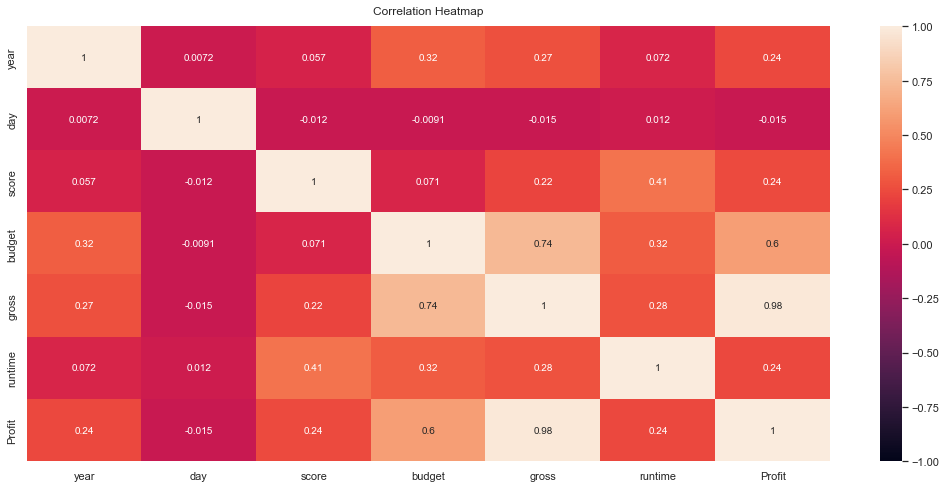

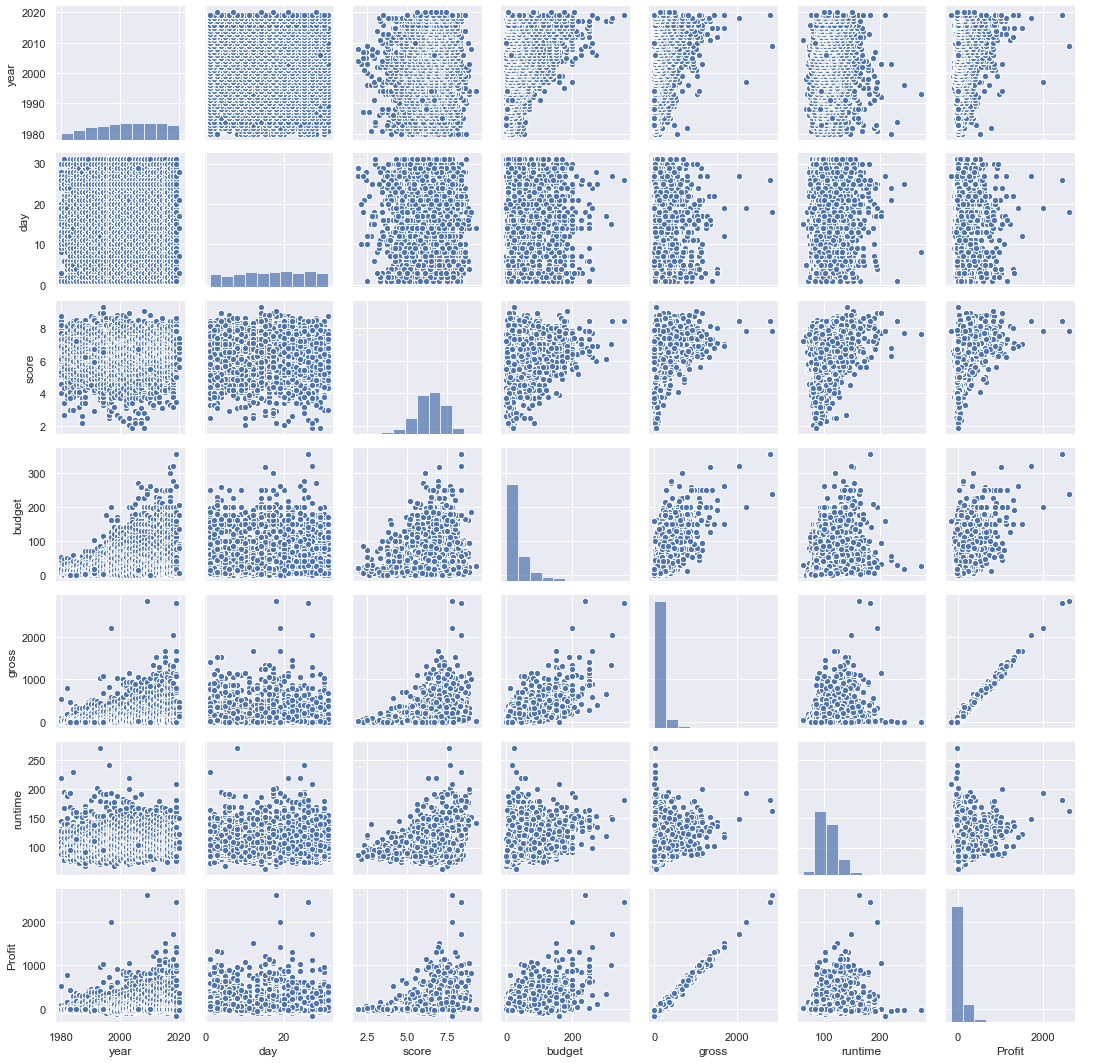

In [83]:
 Visulisation_correlation (df_movies)

by looking at above visulisation, we can see that gross is highly correlated with budget and profit, which is obvious.
after that we can see that gross has approximately same correlation with year, score and runtime.
however, score has not significant correlation with year, day and budget, it has highest corralation with runtime, profit,
and gross acordingly.

C:\Users\ahego\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


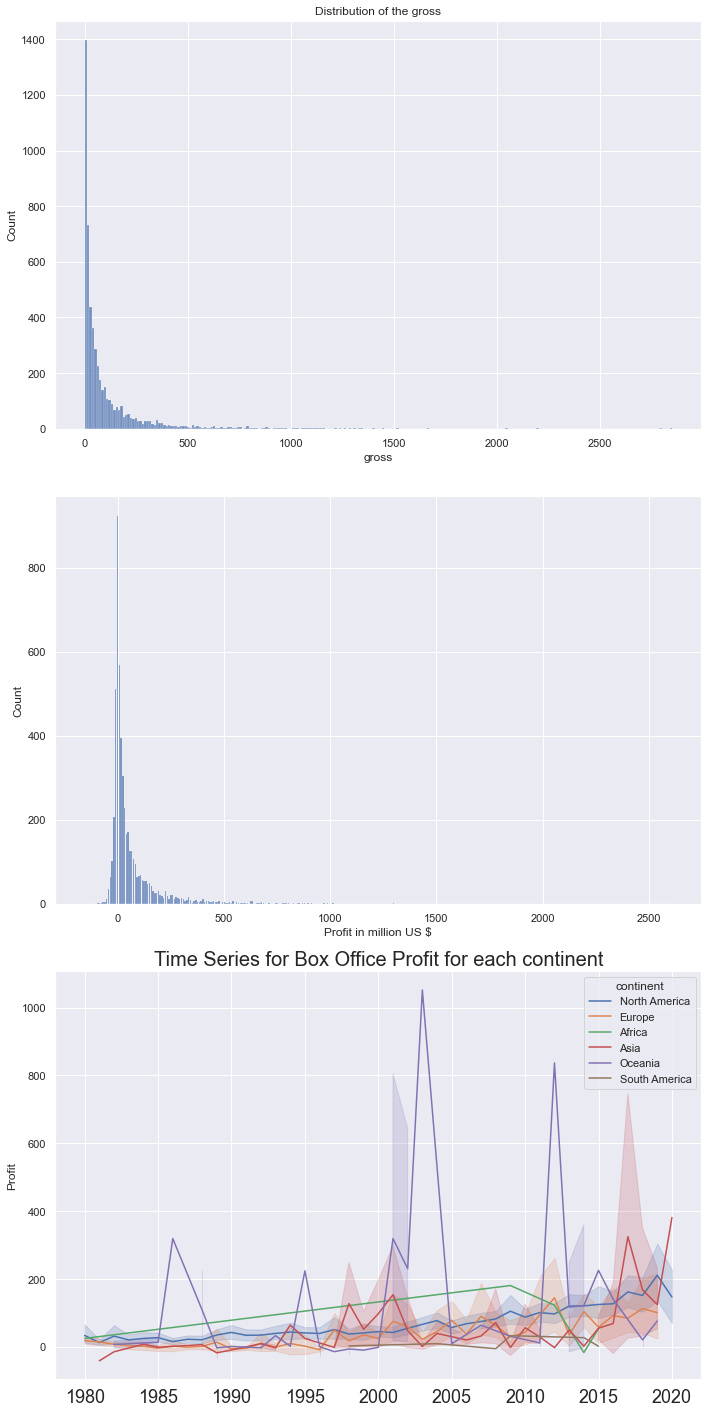

In [112]:
visualisation_gross(df_movies)

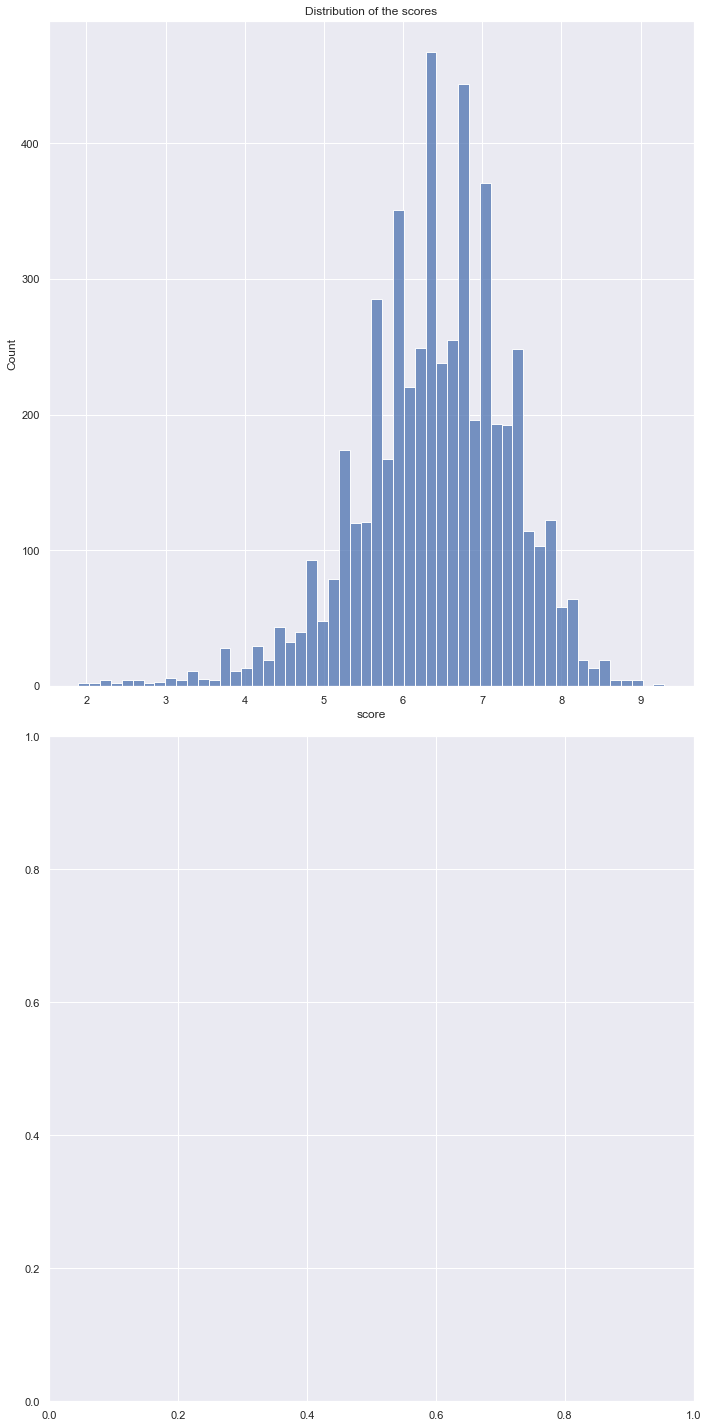

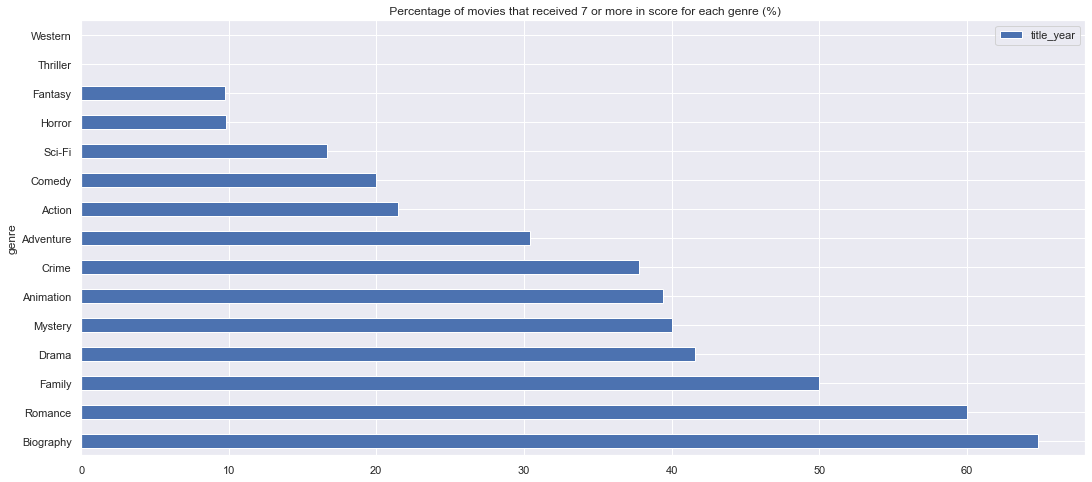

In [113]:
visualisation_score (df_movies)

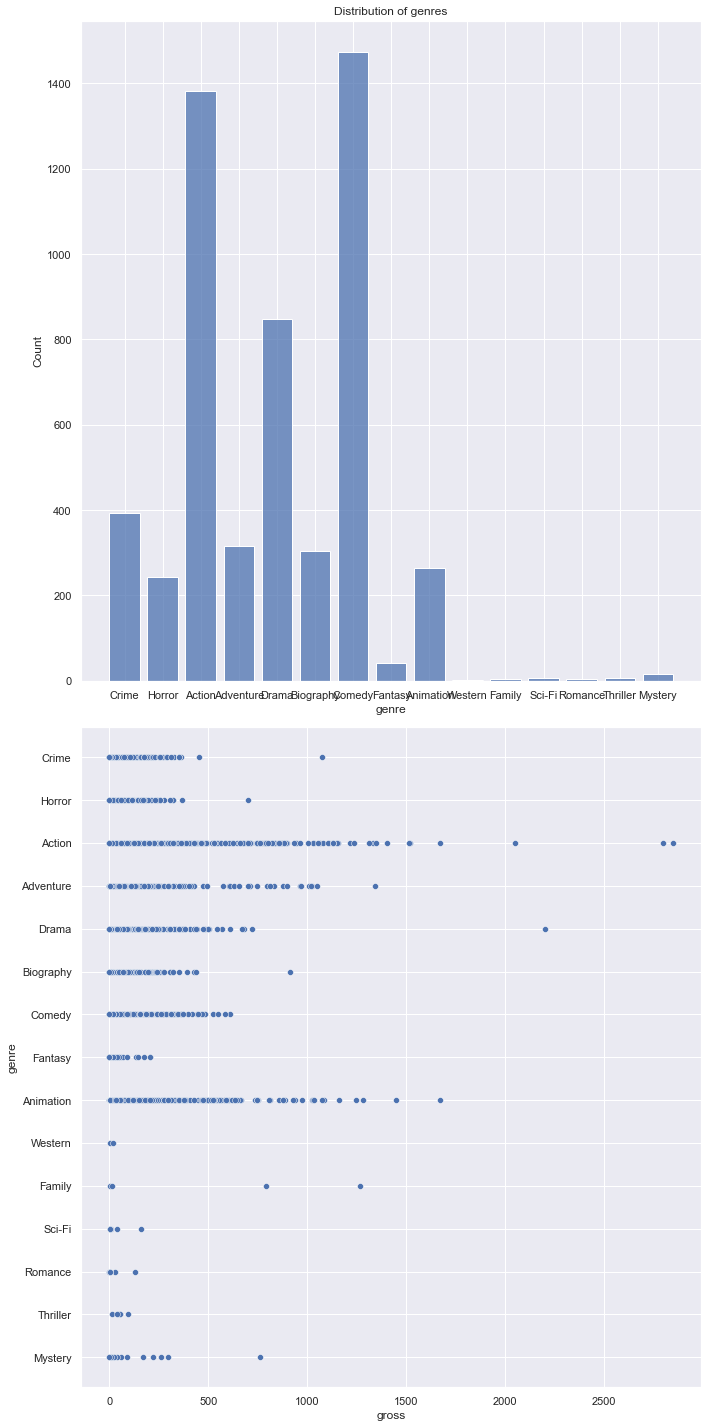

In [114]:
visualisation_genre (df_movies)

<Figure size 720x1440 with 0 Axes>

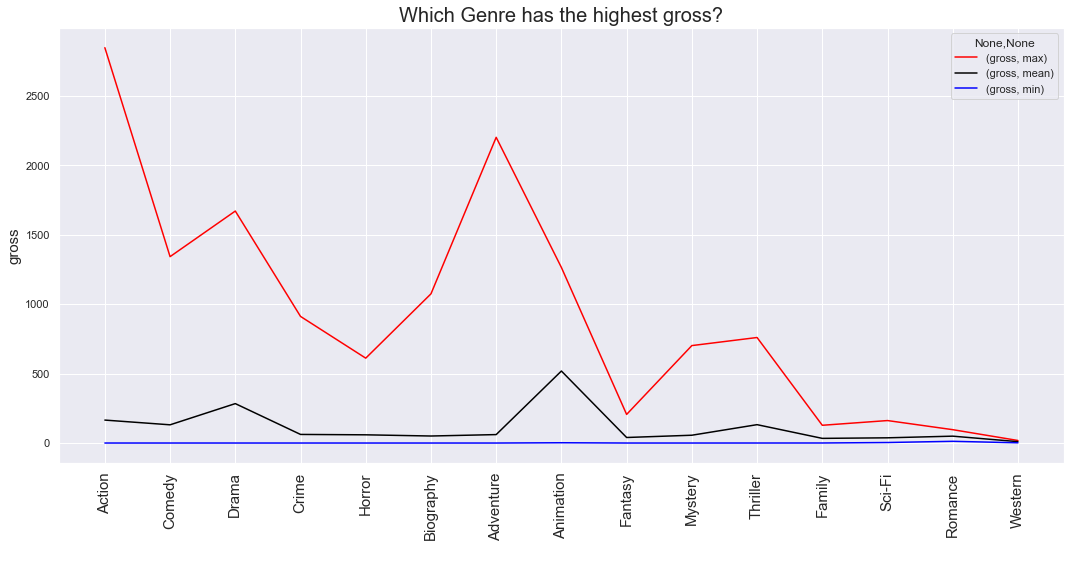

In [117]:
visualisation_genre_gross (df_movies)

<Figure size 720x1440 with 0 Axes>

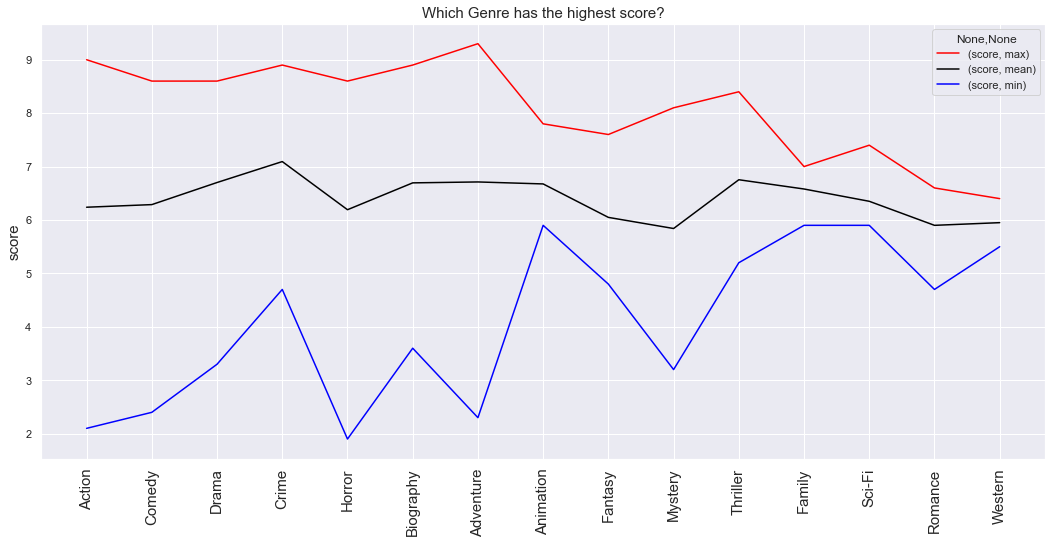

In [118]:
visualisation_genre_score (df_movies)

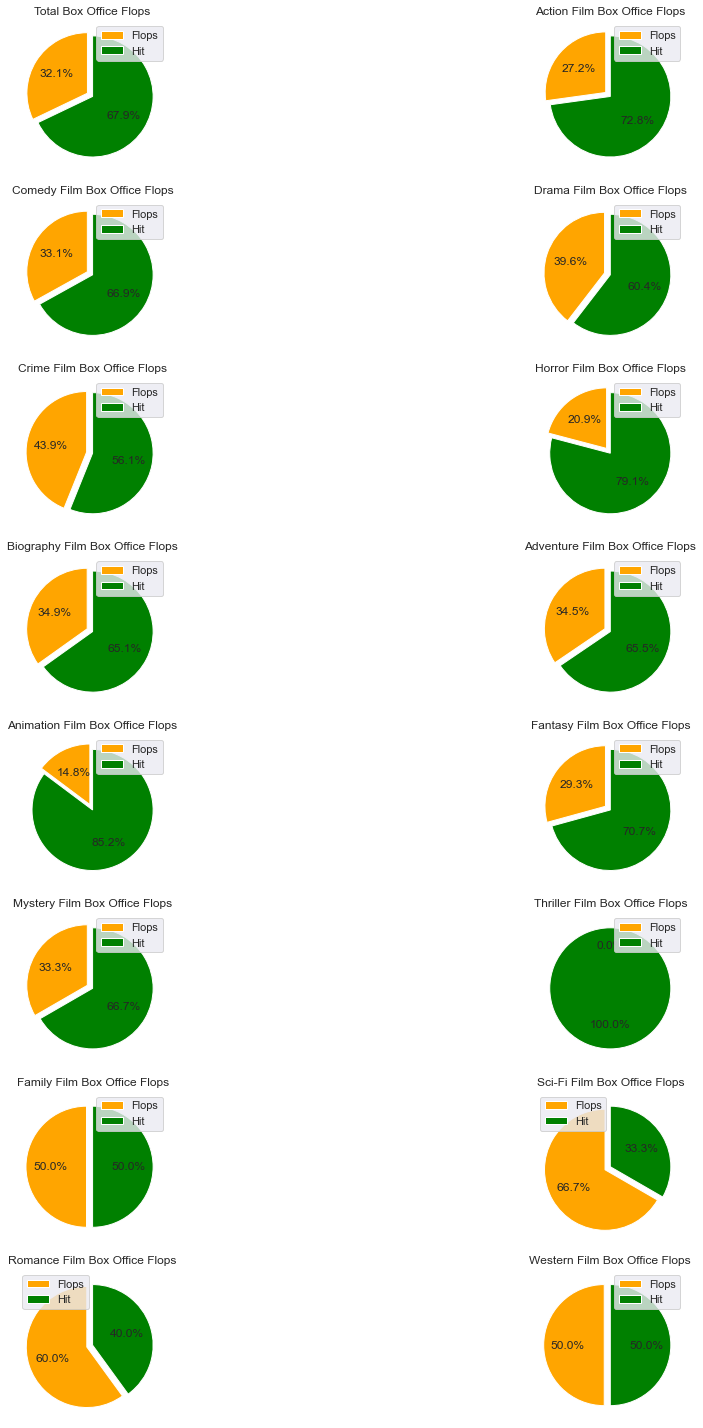

In [119]:
#A movie will be categorized as a flop if the budget is larger then the gross. 
#In the following part the percentage of flops for different genres.
flop_genre(df_movies)

by looking at above visulisations, we can see that:
- most of the movies have gross and profit value less than 100 or 200 million Dollar
- Oceania and Asia have most falctuation in their profit over years
- most of the movies have score between 5- 7.5 
- Biography and Romance movies received 7 or more score, more than other genres
- Action and comedy movies are more dominant
- In general Action and Animation have more gross than other genres
- Action movies has maximum gross between all  genres, however, in average animation movies has higher gross.
- Adventure movies has maximum score between all  genres, however, in average crime movies has higher score, and lowest score is belong to 
 action movies.
- if we ignore Thriller, Animation, Horror, and action movies, respectively, made more profit than other genres.



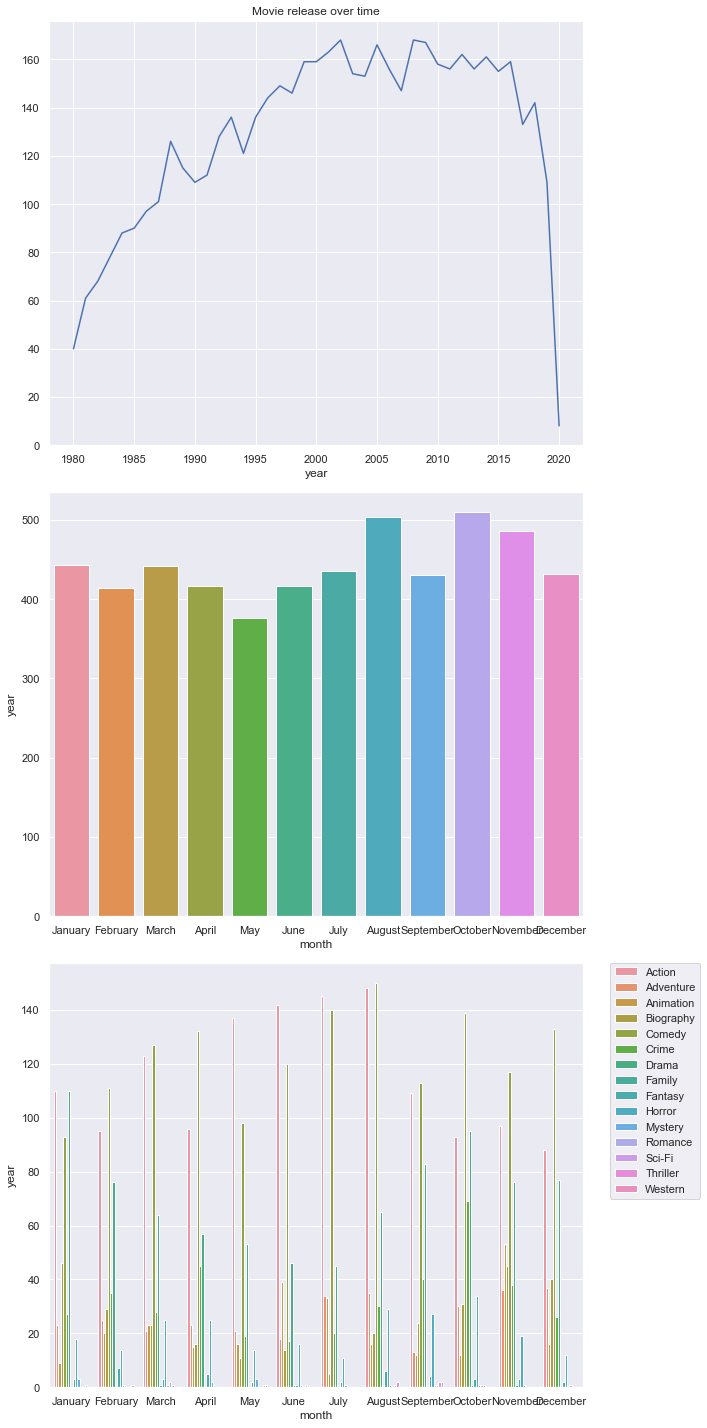

In [130]:
visualisation_year_month (df_movies)

by looking at above visulisation, we can see that:
- Movie releases increased over the period between 1980 to 2018 or 19, but in 2020 the number of movies decresed sharply, this is may be becuse of coronavirus pandemic in the world.
- In October and August more movies are released than other months.
- Comedy and family movies have been the most popular in most months.

Average IMDB Score for Long Duration Movies is 7.01
Average IMDB Score for Short Duration Movies is 6.23
Highest Rated Long Duration Movie
                       title  score
0  The Shawshank Redemption    9.3

Highest Rated Short Duration Movie
                       title  score
0  The Silence of the Lambs    8.6


C:\Users\ahego\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ahego\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ahego\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

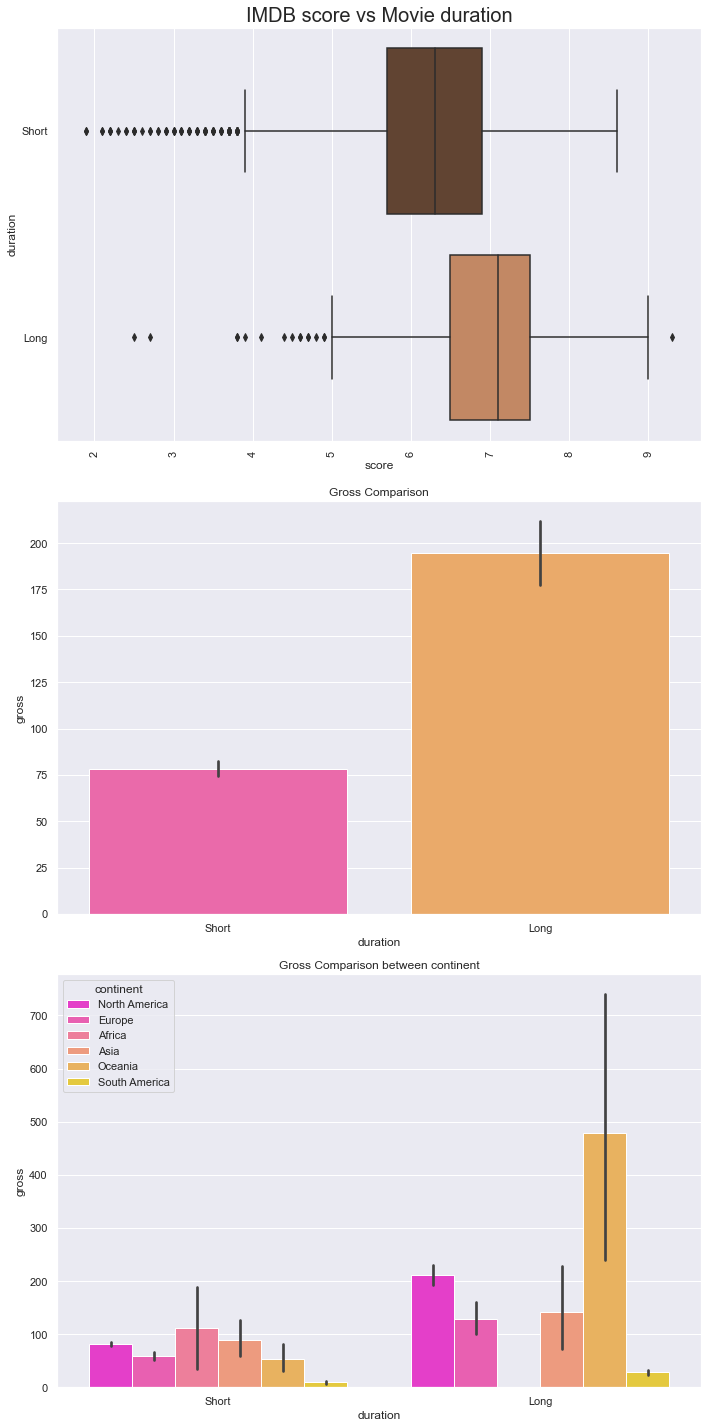

In [123]:
 visualisation_movie_duration (df_movies)

by looking at above visulisation, we can see that:
- movies with long duration have more gross and more score compared to short movies.
- A large number of long movies are released by South America, and then by North America.  

<AxesSubplot:xlabel='nr_cast', ylabel='Count'>

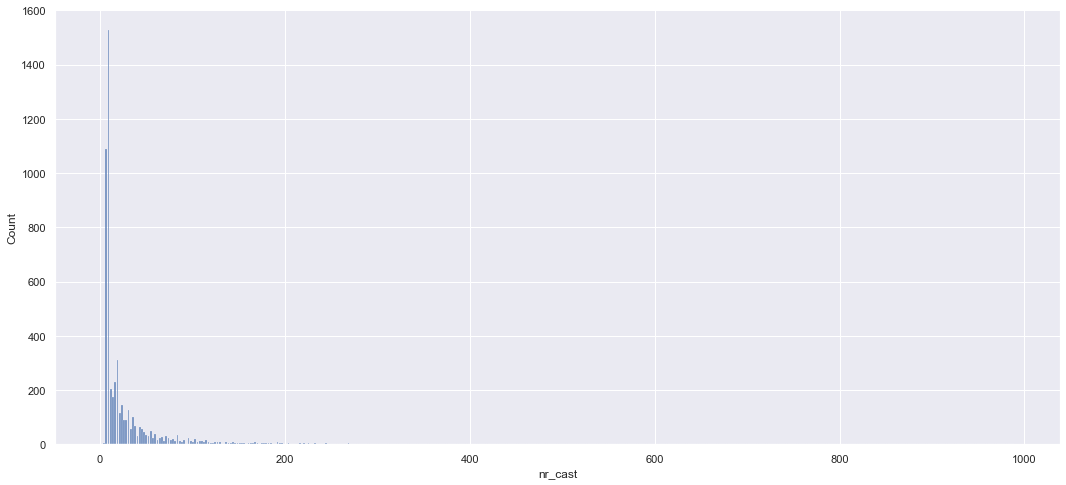

In [139]:
# amount of production people pr. movie 
df_movies['nr_cast'] = df_movies['category'].apply(lambda x: len(x.keys()))
sns.histplot(data=df_movies, x="nr_cast",shrink=.8 )

most of the movies has less than 50 people which were involvede in the production of the movies

The correlation between the average budget and the average revenue is 0.79
The correlation between the average budget and the average score is 0.15


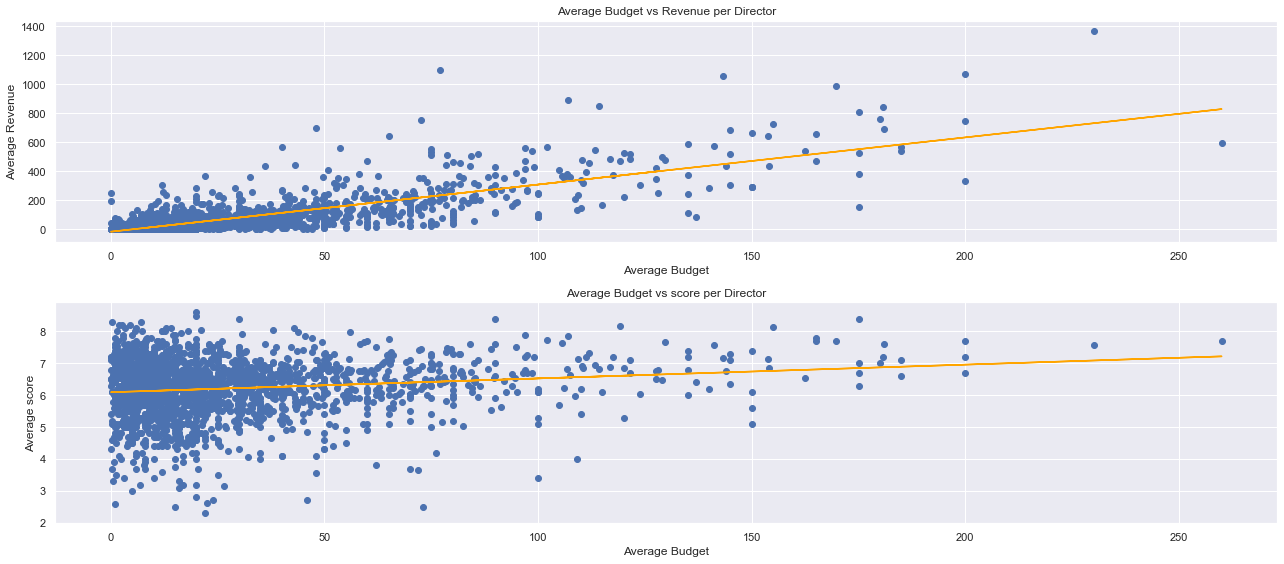

In [132]:
Impact_of_director(df_movies)

In [133]:
# by this function we can see that top movies based on score, gross, profit, loss, director and star
top (df_movies, 10)

10 top score movies


title_year  score
0                      The Shawshank Redemption_1994    9.3
1                               The Dark Knight_2008    9.0
2                              Schindler's List_1993    8.9
3                                  Pulp Fiction_1994    8.9
4  The Lord of the Rings: The Return of the King_...    8.9
5  The Lord of the Rings: The Fellowship of the R...    8.8
6                                  Forrest Gump_1994    8.8
7                                     Inception_2010    8.8
8                                    Fight Club_1999    8.8
9                                    Goodfellas_1990    8.7

10 top gross movies


title        gross
0                   Avatar  2847.246203
1        Avengers: Endgame  2797.501328
2                  Titanic  2201.647264
3   Avengers: Infinity War  2048.359754
4            The Lion King  1670.727580
5           Jurassic World  1670.516444
6             The Avengers  1518.815515
7                Furious 7  1515.341399
8                Frozen II  1450.026933
9  Avengers: Age of Ultron  1402.809540

10 most profitable movies


title_year       Profit
0                                        Avatar_2009  2610.246203
1                             Avengers: Endgame_2019  2441.501328
2                                       Titanic_1997  2001.647264
3                        Avengers: Infinity War_2018  1727.359754
4                                Jurassic World_2015  1520.516444
5                                 The Lion King_2019  1410.727580
6                                     Furious 7_2015  1325.341399
7                                     Frozen II_2019  1300.026933
8                                  The Avengers_2012  1298.815515
9  Harry Potter and the Deathly Hallows: Part 2_2011  1217.321665

10 top Movies that Made Losses


10 top directors by gross


director        gross  title_year
1826   Steven Spielberg  9239.123399          26
102       Anthony Russo  6844.248984           5
1281        Michael Bay  6451.692798          13
771       James Cameron  6248.088578           7
1494      Peter Jackson  5659.038275          10
312   Christopher Nolan  5153.547948          11
442         David Yates  5044.548416           6
1671         Ron Howard  4388.092562          23
997         Jon Favreau  4364.675953           9
1885         Tim Burton  4302.965263          18

10 top directors by score


director  score  title_year
1649       Roberto Benigni    8.6           1
1942             Tony Kaye    8.5           1
1732          Sergio Leone    8.4           1
178        Bob Persichetti    8.4           1
1144           Lee Unkrich    8.4           1
654     Giuseppe Tornatore    8.3           2
1188          Majid Majidi    8.3           1
1048  Juan José Campanella    8.2           1
1879     Thomas Vinterberg    8.2           2
1759       Sriram Raghavan    8.2           1

10 top stars by gross


star         gross  title_year
1445  Robert Downey Jr.  11855.937746          19
1704         Tom Cruise   9602.552559          34
1707          Tom Hanks   8832.974092          37
1783         Will Smith   7947.279234          23
371    Daniel Radcliffe   6971.268037          10
1052  Leonardo DiCaprio   6963.367648          20
1757         Vin Diesel   6036.312568          15
462      Dwayne Johnson   5711.270624          22
216        Bruce Willis   5318.951036          34
287         Chris Pratt   5278.456138           6

10 top stars by score


star  score  title_year
1134         Mark Hamill    8.5           2
1375     Philippe Noiret    8.5           1
1743         Ulrich Mühe    8.4           1
273         Choi Min-sik    8.4           1
105     Anthony Gonzalez    8.4           1
139            Ben Burtt    8.4           1
501        Ellen Burstyn    8.3           1
1253  Mohammad Amir Naji    8.3           1
1352        Payman Maadi    8.3           1
539    F. Murray Abraham    8.3           1

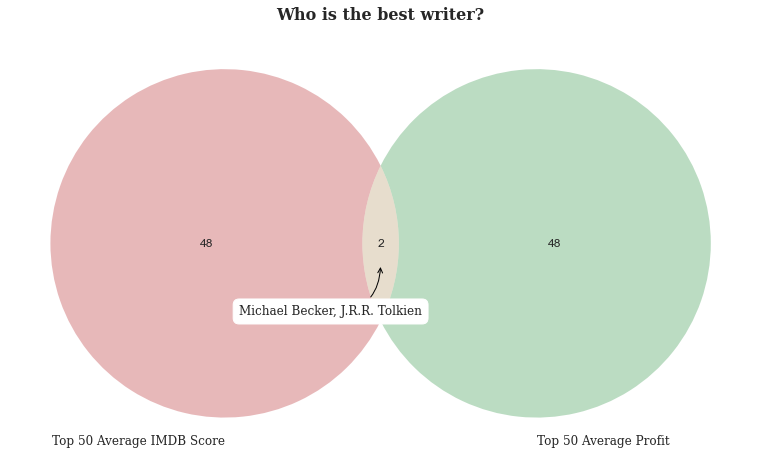

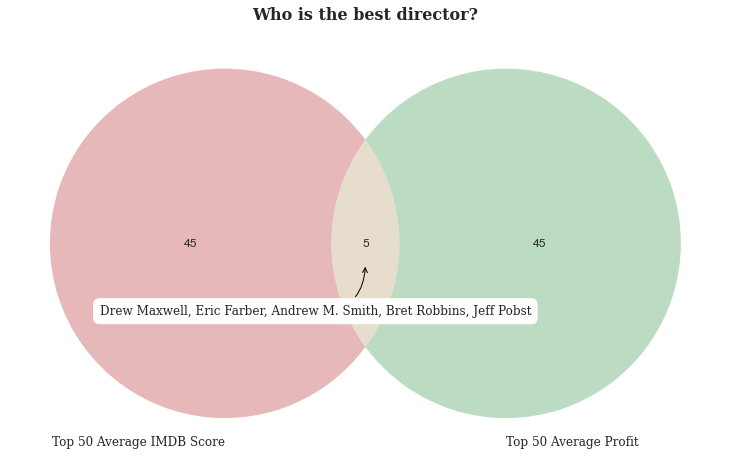

In [136]:
# by this function we can see that top writer, director, actor,...  based on 
#Top 50 Average IMDB Score  and Top 50 Average Profit
best('writer')
best('director')

In [138]:
# by this functions we can see top moves of each writer, director, actor,... 
recommend_movies_on_directors('Christopher Nolan')

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


title  score
152426        The Dark Knight    9.0
164059              Inception    8.8
187818           Interstellar    8.6
143239           The Prestige    8.5
176288  The Dark Knight Rises    8.4
109624                Memento    8.4
137042          Batman Begins    8.2
207156                Dunkirk    7.8
99861               Following    7.5
221014                  Tenet    7.4